# k-Nearest Neighbors Classification with scikit-learn

This notebook demonstrates how to use the k-NN algorithm to classify data points using the scikit-learn library. It uses the Iris dataset to show classification of setosa and versicolor species based on sepal measurements.

## Import Required Libraries

Import the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
# Import the required libraries.
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

## Load and Prepare the Iris Dataset

Load the Iris dataset, convert it to a DataFrame, and filter to include only setosa and versicolor classes with sepal measurements.

In [2]:
# Load the Iris dataset.
# pylint: disable=E1101
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

# Filter the dataset to show only two classes (0 = setosa and 1 = versicolor).
filtered_iris_df = iris_df[iris_df["target"].isin([0, 1])].iloc[:, [0, 1, -1]]

## Generate Random Test Data

Create random data points and calculate the midpoint between the nearest setosa and versicolor points for testing.

In [3]:
# Generate three random data.
random.seed(2)
random_data = []
for _ in range(2):
    random_data.append(
        np.array([random.uniform(4.5, 7.0), random.uniform(2.0, 4.5)])
    )

# Find the nearest points from setosa and versicolor.
setosa_points = filtered_iris_df[
    filtered_iris_df["target"] == 0].iloc[:, :-1].values
versicolor_points = filtered_iris_df[
    filtered_iris_df["target"] == 1].iloc[:, :-1].values

nearest_setosa = setosa_points[
    np.argmin(
        np.linalg.norm(
            setosa_points - versicolor_points.mean(axis=0), axis=1
        )
    )
]
nearest_versicolor = versicolor_points[
    np.argmin(
        np.linalg.norm(
            versicolor_points - setosa_points.mean(axis=0), axis=1
        )
    )
]

# Calculate the midpoint between the nearest setosa and versicolor points.
midpoint = (nearest_setosa + nearest_versicolor) / 2
random_data.append(midpoint)
random_data = np.asarray(random_data)

## Visualize Dataset Before Classification

Plot the filtered Iris dataset with the random test points before applying k-NN classification.

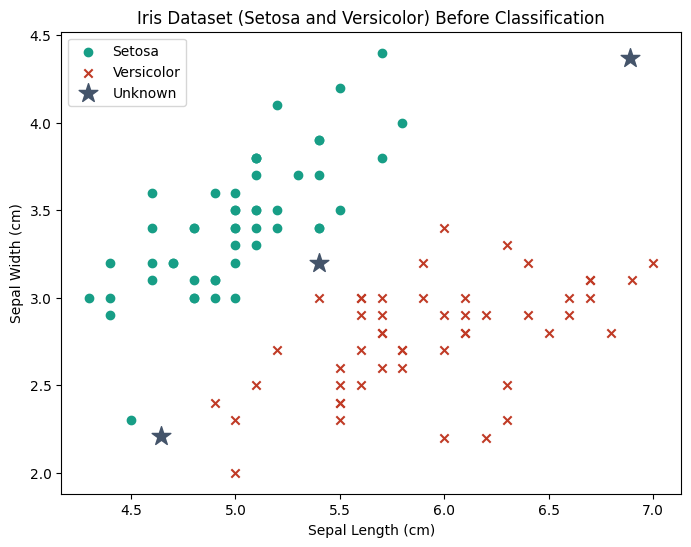

In [4]:
# Plot the dataset before classification.
plt.figure(figsize=(8, 6))
plt.scatter(
    filtered_iris_df[filtered_iris_df["target"] == 0]["sepal length (cm)"],
    filtered_iris_df[filtered_iris_df["target"] == 0]["sepal width (cm)"],
    color="#179E86", label="Setosa", marker="o"
)
plt.scatter(
    filtered_iris_df[filtered_iris_df["target"] == 1]["sepal length (cm)"],
    filtered_iris_df[filtered_iris_df["target"] == 1]["sepal width (cm)"],
    color="#C03B26", label="Versicolor", marker="x"
)

# Plot the new random data.
plt.scatter(
    random_data[:, 0], random_data[:, 1],
    color="#44546A", label="Unknown", marker="*", s=200
)

# Plot information.
plt.title("Iris Dataset (Setosa and Versicolor) Before Classification")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(loc="upper left")
plt.show()

## Train k-NN Classifier

Split the dataset into training and testing sets, then train a k-NN classifier.

In [5]:
# Split the dataset into training and testing sets.
X = filtered_iris_df.drop("target", axis=1)
y = filtered_iris_df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train the k-NN classifier.
k = 9  # Number of neighbors.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

,n_neighbors,9
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


## Classify Random Data

Use the trained k-NN model to classify the random test data points.

In [6]:
# Classify the random data using k-NN.
predicted_class = knn.predict(random_data)

/Users/fabricio/.miniforge3/envs/damin2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Visualize Dataset After Classification

Plot the dataset again, now showing the classified random points with their predicted classes.

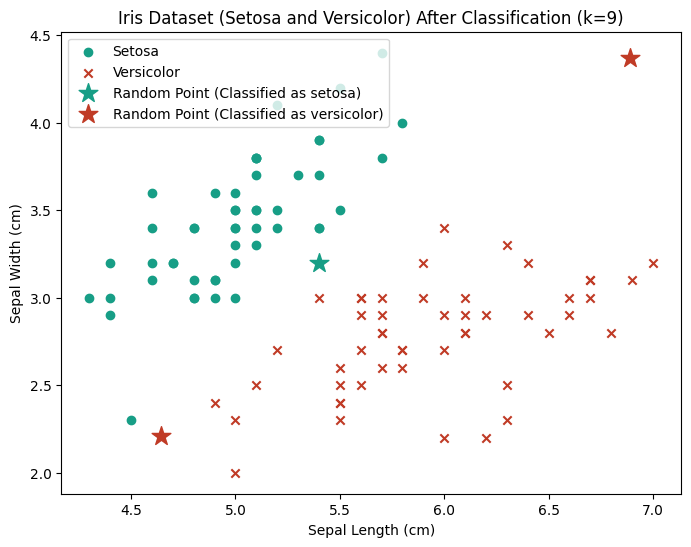

In [7]:
# Plot the dataset after classification, including the random data.
plt.figure(figsize=(8, 6))
plt.scatter(
    filtered_iris_df[filtered_iris_df["target"] == 0]["sepal length (cm)"],
    filtered_iris_df[filtered_iris_df["target"] == 0]["sepal width (cm)"],
    color="#179E86", label="Setosa", marker="o"
)
plt.scatter(
    filtered_iris_df[filtered_iris_df["target"] == 1]["sepal length (cm)"],
    filtered_iris_df[filtered_iris_df["target"] == 1]["sepal width (cm)"],
    color="#C03B26", label="Versicolor", marker="x"
)

# Plot the classified random data.
for i in range(2):
    COLOR = "#C03B26" if i else "#179E86"
    CLASS_NAME = "versicolor" if i else "setosa"
    plt.scatter(
        random_data[predicted_class == i, 0],
        random_data[predicted_class == i, 1], color=COLOR,
        label=f"Random Point (Classified as {CLASS_NAME})",
        marker="*", s=200
    )

# Plot information.
plt.title(f"Iris Dataset (Setosa and Versicolor) After Classification (k={k})")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(loc="upper left")
plt.show()

# K-Nearest Neighbors Classification

This notebook demonstrates how to use the k-NN algorithm to classify data points using the scikit-learn library.

**License:** MIT License  
**Copyright:** (c) 2024 Fabricio Batista Narcizo

In [8]:
# Import the required libraries.
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [9]:
# Load the Iris dataset.
# pylint: disable=E1101
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

# Filter the dataset to show only two classes (0 = setosa and 1 = versicolor).
filtered_iris_df = iris_df[iris_df["target"].isin([0, 1])].iloc[:, [0, 1, -1]]

In [10]:
# Generate three random data.
random.seed(2)
random_data = []
for _ in range(2):
    random_data.append(
        np.array([random.uniform(4.5, 7.0), random.uniform(2.0, 4.5)])
    )

# Find the nearest points from setosa and versicolor.
setosa_points = filtered_iris_df[
    filtered_iris_df["target"] == 0].iloc[:, :-1].values
versicolor_points = filtered_iris_df[
    filtered_iris_df["target"] == 1].iloc[:, :-1].values

nearest_setosa = setosa_points[
    np.argmin(
        np.linalg.norm(
            setosa_points - versicolor_points.mean(axis=0), axis=1
        )
    )
]
nearest_versicolor = versicolor_points[
    np.argmin(
        np.linalg.norm(
            versicolor_points - setosa_points.mean(axis=0), axis=1
        )
    )
]

# Calculate the midpoint between the nearest setosa and versicolor points.
midpoint = (nearest_setosa + nearest_versicolor) / 2
random_data.append(midpoint)
random_data = np.asarray(random_data)

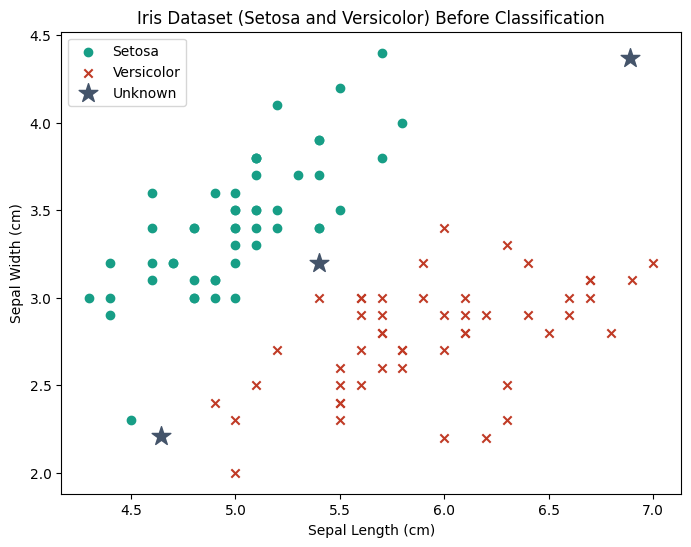

In [11]:
# Plot the dataset before classification.
plt.figure(figsize=(8, 6))
plt.scatter(
    filtered_iris_df[filtered_iris_df["target"] == 0]["sepal length (cm)"],
    filtered_iris_df[filtered_iris_df["target"] == 0]["sepal width (cm)"],
    color="#179E86", label="Setosa", marker="o"
)
plt.scatter(
    filtered_iris_df[filtered_iris_df["target"] == 1]["sepal length (cm)"],
    filtered_iris_df[filtered_iris_df["target"] == 1]["sepal width (cm)"],
    color="#C03B26", label="Versicolor", marker="x"
)

# Plot the new random data.
plt.scatter(
    random_data[:, 0], random_data[:, 1],
    color="#44546A", label="Unknown", marker="*", s=200
)

# Plot information.
plt.title("Iris Dataset (Setosa and Versicolor) Before Classification")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(loc="upper left")
plt.show()

In [12]:
# Split the dataset into training and testing sets.
X = filtered_iris_df.drop("target", axis=1)
y = filtered_iris_df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create and train the k-NN classifier.
k = 9  # Number of neighbors.
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Classify the random data using k-NN.
predicted_class = knn.predict(random_data)

/Users/fabricio/.miniforge3/envs/damin2025/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


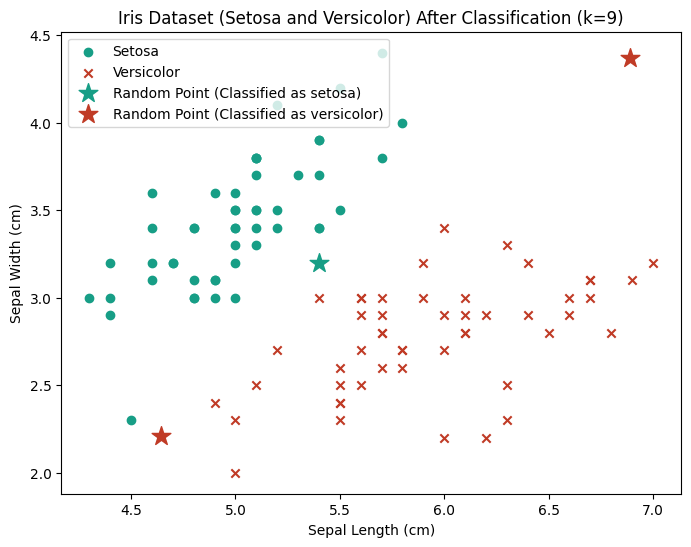

In [13]:
# Plot the dataset after classification, including the random data.
plt.figure(figsize=(8, 6))
plt.scatter(
    filtered_iris_df[filtered_iris_df["target"] == 0]["sepal length (cm)"],
    filtered_iris_df[filtered_iris_df["target"] == 0]["sepal width (cm)"],
    color="#179E86", label="Setosa", marker="o"
)
plt.scatter(
    filtered_iris_df[filtered_iris_df["target"] == 1]["sepal length (cm)"],
    filtered_iris_df[filtered_iris_df["target"] == 1]["sepal width (cm)"],
    color="#C03B26", label="Versicolor", marker="x"
)

# Plot the classified random data.
for i in range(2):
    COLOR = "#C03B26" if i else "#179E86"
    CLASS_NAME = "versicolor" if i else "setosa"
    plt.scatter(
        random_data[predicted_class == i, 0],
        random_data[predicted_class == i, 1], color=COLOR,
        label=f"Random Point (Classified as {CLASS_NAME})",
        marker="*", s=200
    )

# Plot information.
plt.title(f"Iris Dataset (Setosa and Versicolor) After Classification (k={k})")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(loc="upper left")
plt.show()